#**Pouya Shaeri**
#**400422105**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the dataset from Kaggle

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pouyashaeri","key":"b80538d07a0739db1eece5366aafd3f9"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 113MB/s]


In [6]:
!ls

kaggle.json  new-york-city-airbnb-open-data.zip  sample_data


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('new-york-city-airbnb-open-data.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
df_original = pd.read_csv('/content/files/AB_NYC_2019.csv')

# **Task 1: Delete or Impute Missing Data**

In [8]:
df_original

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Make A Copy of df_original and name it : df

In [9]:
df = df_original

Identifying the Types of the Columns and Missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

drop the columns that have more than 50% missing datas.

In [12]:
df = df.drop(columns = df.columns[df.isna().sum()/len(df) > 0.50])
df.shape

(48895, 16)

age ino nemizashtam fk kon 0 ta cm gerefte bode kollan bad review per monthesh miangin bishtaraz 0 mikhord

In [13]:
for i in range(0, df.shape[0]):
  if df['number_of_reviews'][i] == 0 :
    df.reviews_per_month[i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


'Last review' column is DateTime but in this dataset, it has been recognized as Object. So we're gonna convert it to DateTime

In [15]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

delete columns without useful information




In [16]:
df = df.drop(columns=['id', 'name', 'host_name'])
df.shape

(48895, 13)

fillna numeric data by mean

In [17]:
df._get_numeric_data().mean()

host_id                           6.762001e+07
latitude                          4.072895e+01
longitude                        -7.395217e+01
price                             1.527207e+02
minimum_nights                    7.029962e+00
number_of_reviews                 2.327447e+01
reviews_per_month                 1.090910e+00
calculated_host_listings_count    7.143982e+00
availability_365                  1.127813e+02
dtype: float64

In [18]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         48895 non-null  int64         
 1   neighbourhood_group             48895 non-null  object        
 2   neighbourhood                   48895 non-null  object        
 3   latitude                        48895 non-null  float64       
 4   longitude                       48895 non-null  float64       
 5   room_type                       48895 non-null  object        
 6   price                           48895 non-null  int64         
 7   minimum_nights                  48895 non-null  int64         
 8   number_of_reviews               48895 non-null  int64         
 9   last_review                     38843 non-null  datetime64[ns]
 10  reviews_per_month               48895 non-null  float64       
 11  ca

Mibinim k **Memory Usage** Kam Shod 🔽

Categoricala null hasho ba mode por konim

In [20]:
df.isna().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
df.shape

(48895, 13)


bebininm Unique ha chantano age Niaz bood ye sootoone Others bokonim

In [22]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , unique values : {}'.format(cols,df[cols].nunique()))

cols : neighbourhood_group , unique values : 5
cols : neighbourhood , unique values : 221
cols : room_type , unique values : 3


In [23]:
df.drop(columns = 'neighbourhood' , inplace = True)

In [24]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('------------------------------')
        print('cols : {} ,\n{}'.format(cols,df[cols].value_counts()))

------------------------------
cols : neighbourhood_group ,
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
------------------------------
cols : room_type ,
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [25]:
df.shape

(48895, 12)

In [ ]:
# others = list(df['neighbourhood_group'].value_counts().tail(3).index)

In [ ]:
# def edit_neighbourhood_group(x):
#     if x in others:
#         return 'other'
#     else:
#         return x

In [ ]:
# df['neighbourhood_group_edit'] = df['neighbourhood_group'].apply(edit_neighbourhood_group)
# #df = df.drop(columns = ['neighbourhood_group'])
# df['neighbourhood_group_edit'].value_counts()*100 / len(df)

 **Categoricala** ro **Numeric** konim

In [26]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        columns.append(cols)

columns

['neighbourhood_group', 'room_type']

In [27]:
dummies_feature = pd.get_dummies(df[columns])

df = pd.concat([df, dummies_feature], axis=1)

In [28]:
#df.drop(columns = columns , inplace = True)

In [29]:
df

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,0,0,1,0,0,0,1,0
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9,0,1,0,0,0,0,1,0
48891,6570630,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36,0,1,0,0,0,0,1,0
48892,23492952,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27,0,0,1,0,0,1,0,0
48893,30985759,Manhattan,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2,0,0,1,0,0,0,0,1


In [30]:
df.shape

(48895, 20)

**ba Z-Score dade haye Parto Hazf kardam**

\begin{equation*}
\mu-3σ \leq x \leq \mu+3σ
\end{equation*}

In [31]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [ ]:
df.shape

(44123, 20)

# **Task 2: Visualize and Data Analysis**

In [32]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,4.412300e+04,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000,44123.000000
mean,6.472237e+07,40.729984,-73.955022,138.780613,5.914942,17.693335,0.883849,3.710332,104.375428,0.021667,0.432156,0.445391,0.096979,0.003808,0.515559,0.459919,0.024522
std,7.690577e+07,0.053750,0.035958,107.917001,8.823958,29.144039,1.182508,11.337741,129.305236,0.145594,0.495381,0.497015,0.295932,0.061588,0.499764,0.498397,0.154666
min,2.438000e+03,40.565460,-74.089010,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.573657e+06,40.690580,-73.982420,69.000000,2.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.872267e+07,40.723610,-73.955820,105.000000,3.000000,5.000000,0.320000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,9.942222e+07,40.763820,-73.938155,175.000000,5.000000,20.000000,1.290000,2.000000,200.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.743213e+08,40.892450,-73.815140,860.000000,68.000000,155.000000,5.320000,103.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Tedade Agahi ha Dar har mantaghe Joghrafiyayi

In [33]:
df['neighbourhood_group_Manhattan'].sum()

19652

In [34]:
df['neighbourhood_group_Brooklyn'].sum()

19068

In [35]:
df['neighbourhood_group_Queens'].sum()

4279

In [36]:
df['neighbourhood_group_Bronx'].sum()

956

In [37]:
df['neighbourhood_group_Staten Island'].sum()

168

In [38]:
df.neighbourhood_group.value_counts()

Manhattan        19652
Brooklyn         19068
Queens            4279
Bronx              956
Staten Island      168
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


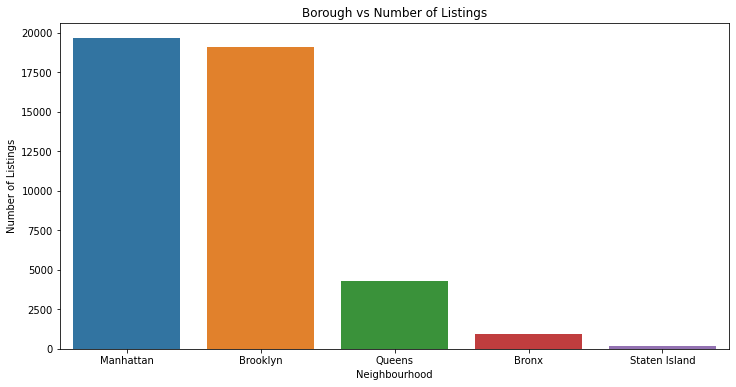

In [39]:
neighbourhood = df['neighbourhood_group'].value_counts().reset_index()
neighbourhood.rename(columns={'index':'Neighbourhood','neighbourhood_group':'Number of Listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(neighbourhood['Neighbourhood'],neighbourhood['Number of Listings']);
plt.title('Borough vs Number of Listings');

In [40]:
df.neighbourhood_group.value_counts()/len(df)

Manhattan        0.445391
Brooklyn         0.432156
Queens           0.096979
Bronx            0.021667
Staten Island    0.003808
Name: neighbourhood_group, dtype: float64

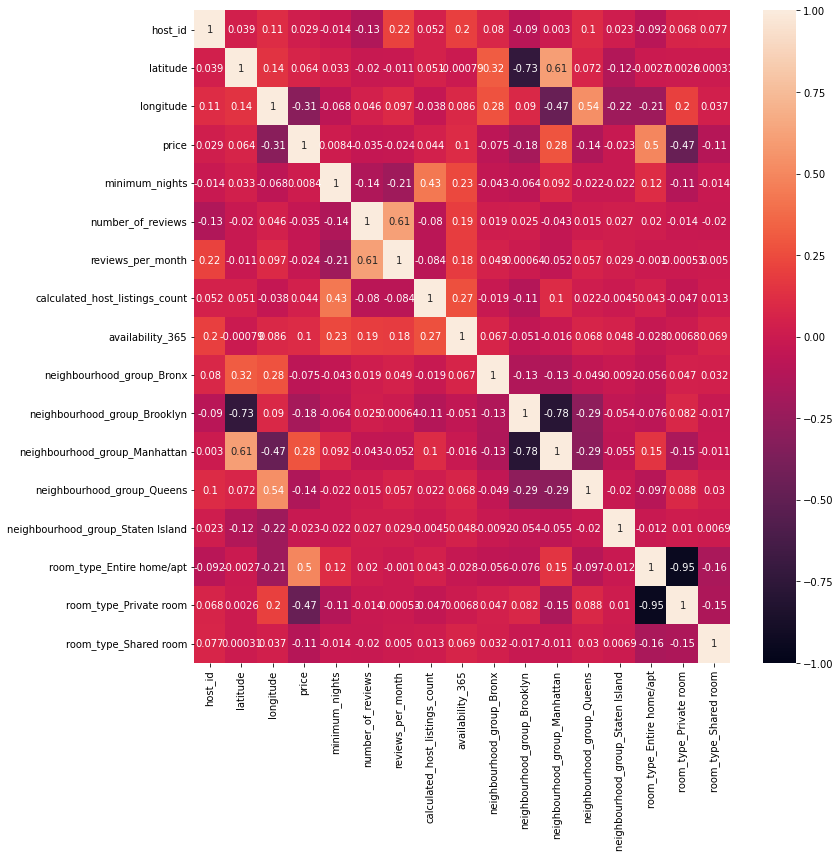

In [43]:
correlation = df.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation,linewidths=0, vmin=-1,annot=True)

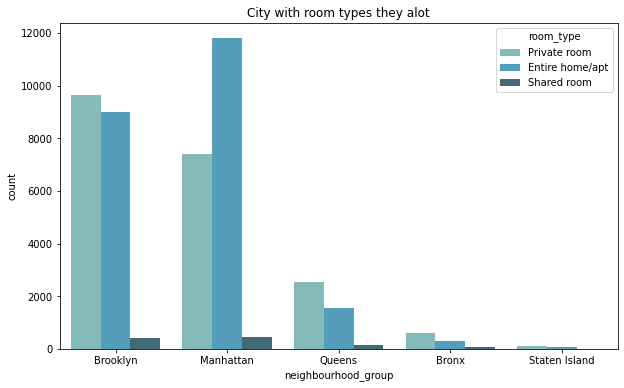

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='neighbourhood_group',hue='room_type',palette='GnBu_d')
plt.title('City with room types they alot')
plt.show()

# **Task 3**

Chanta Agahi Male ye Nafare ?

In [48]:
df['host_id'].value_counts()

137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
            ... 
545273         1
7609268        1
30789837       1
25233652       1
68119814       1
Name: host_id, Length: 34837, dtype: int64

# **Task 4**

اگر تعداد کامنت های برای یک آگهی را بتوان شاخصی از تعداد مشتریان در نظر گرفت
مطلوب است یافتن صاحبان آگهی که بیشترین مشتری را دارا می باشند و بررسی علت
های آن.

In [49]:
df_sorted = df.sort_values(by= 'number_of_reviews', ascending= False)
df_sorted

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
152,142684,Brooklyn,40.71536,-73.96057,Private room,125,3,155,2019-06-13,1.61,1,1,0,1,0,0,0,0,1,0
4280,2074433,Manhattan,40.77397,-73.98242,Entire home/apt,299,2,155,2019-06-21,2.46,1,267,0,0,1,0,0,1,0,0
7578,22020703,Manhattan,40.85494,-73.93179,Private room,75,1,155,2019-07-07,4.42,1,314,0,0,1,0,0,0,1,0
21292,2788934,Brooklyn,40.72155,-73.94414,Private room,59,2,155,2019-06-30,5.20,2,60,0,1,0,0,0,0,1,0
18062,85375269,Queens,40.68904,-73.85052,Entire home/apt,71,1,155,2019-07-01,4.34,1,173,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27546,4696622,Brooklyn,40.72747,-73.95462,Entire home/apt,95,3,0,NaT,0.00,1,0,0,1,0,0,0,1,0,0
27549,157825168,Brooklyn,40.71850,-73.94888,Private room,148,2,0,NaT,0.00,1,0,0,1,0,0,0,0,1,0
27551,102685703,Manhattan,40.74394,-73.99923,Private room,120,4,0,NaT,0.00,1,0,0,0,1,0,0,0,1,0
27555,2179407,Manhattan,40.78720,-73.97639,Private room,80,2,0,NaT,0.00,1,0,0,0,1,0,0,0,1,0


In [50]:
df_sorted[['host_id','number_of_reviews']]

,host_id,number_of_reviews
152,142684,155
4280,2074433,155
7578,22020703,155
21292,2788934,155
18062,85375269,155
...,...,...
27546,4696622,0
27549,157825168,0
27551,102685703,0
27555,2179407,0


# **Task 5**

مطرح کردن ۵ آزمون فرض دلخواه در داده ها و پاسخ گویی و تفسیر آنها (حداقل از ٣
آزمون فرض متفاوت استفاده کنید.)

In [51]:
! pip install scipy==1.6.2

     |████████████████████████████████| 27.4 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [52]:
import scipy
print(scipy.__version__)

1.4.1


In [53]:
from scipy import stats

In [54]:
df.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,0,0,1,0,0,0,1,0
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0
5,7322,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,0,0,1,0,0,1,0,0


### **1. New-York Houses have average Price 100**

\begin{align}
H_0:& \mu = 100$ \\
H_1:& \mu \neq 100 $
\end{align}

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_1samp(df['price'],popmean = 100)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 75.48442000042958 , p_value : 0.0
reject null hypothesis


In [ ]:
df['price'].mean()

138.780613285588

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_1samp(df['price'],popmean = 138.780613285588)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 0.0 , p_value : 1.0
accept null hypothesis


In [ ]:
alpha = 0.000000001 
tstat,p_value = stats.ttest_1samp(df['price'],popmean = 136.5)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 4.439093570803861 , p_value : 9.055731271790679e-06
accept null hypothesis


### **2. room_type : Private room / NOT Private room not effects on Price of the Houses**

In [ ]:
pvroom = df[df['room_type_Private room']== 1]
notpvroom = df[df['room_type_Private room'] == 0]

In [ ]:
pvroom.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,0,0,1,0,0,0,1,0
6,7356,Brooklyn,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,0,1,0,0,0,0,1,0
8,7490,Manhattan,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,0,0,1,0,0,0,1,0
13,11528,Manhattan,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333,0,0,1,0,0,0,1,0


In [ ]:
notpvroom.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0
5,7322,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,0,0,1,0,0,1,0,0
10,7702,Manhattan,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,0,0,1,0,0,1,0,0
15,15991,Brooklyn,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,0,1,0,0,0,1,0,0


In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(pvroom.price,notpvroom.price,equal_var = True,alternative='two-sided')

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -111.02893805007345 , p_value : 0.0
reject null hypothesis


### **3. neighbourhood_group effects on Price of the Houses**

In [ ]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
Brooklyn = df[df.neighbourhood_group == 'Brooklyn']
Manhattan = df[df.neighbourhood_group == 'Manhattan']
Queens = df[df.neighbourhood_group == 'Queens']
Bronx = df[df.neighbourhood_group == 'Bronx']
Staten_Island = df[df.neighbourhood_group == 'Staten Island']

In [ ]:
alpha = 0.05
fstat,p_value = stats.f_oneway(Brooklyn.price ,Manhattan.price ,Queens.price, Bronx.price, Staten_Island.price)

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 1036.1609904438747 , p_value : 0.0
reject null hypothesis


### **4. relation between room_type as categorical feature and neighbourhood_group as categorical feature**

In [ ]:
contingency_table=pd.crosstab(df['neighbourhood_group'],df['room_type'])
print('contingency_table : \n',contingency_table)

contingency_table : 
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            312           589           55
Brooklyn                        8997          9662          409
Manhattan                      11799          7408          445
Queens                          1570          2543          166
Staten Island                     70            91            7


In [ ]:
contingency_table.values

array([[  312,   589,    55],
       [ 8997,  9662,   409],
       [11799,  7408,   445],
       [ 1570,  2543,   166],
       [   70,    91,     7]])

In [ ]:
chi2_stat , p_value , dof , expected = stats.chi2_contingency(contingency_table.values)

In [ ]:
print('dof : ',dof)
print('chi2 stat : {} , p_value : {}'.format(chi2_stat,p_value))
print('expected value : \n',expected)

dof :  8
chi2 stat : 1294.2319398297288 , p_value : 4.148729672219326e-274
expected value : 
 [[4.92874193e+02 4.39682433e+02 2.34433742e+01]
 [9.83067480e+03 8.76973288e+03 4.67592321e+02]
 [1.01317611e+04 9.03832550e+03 4.81913379e+02]
 [2.20607601e+03 1.96799282e+03 1.04931170e+02]
 [8.66138748e+01 7.72663690e+01 4.11975614e+00]]


In [ ]:
alpha = 0.05

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


### **5. Kruskal-Wallis H Test**
Tests whether the distributions of two or more independent samples are equal or not.

masalan: Distributione Price va Number of reviews

In [ ]:
from scipy.stats import kruskal
stat, p = kruskal(df.price, df.number_of_reviews)
print('stat = %.3f, p = %.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat = 54719.911, p = 0.000
Probably different distributions


# **TASK 6**

تلاش در ساخت مدل برای پیش بینی پارامترهایی همانند قیمت و ارایه این مدل ها و
تفسیر آنها.

In [55]:
df.columns

Index(['host_id', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [56]:
y = df['price']
x = df.drop(columns = ['price', 'neighbourhood_group', 'room_type' , 'last_review', 'host_id', 'neighbourhood_group', 'latitude', 'longitude'])

print(x.shape)
print(y.shape)

(44123, 13)
(44123,)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,train_size=0.8)

In [59]:
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test  = std_scale.transform(x_test)

Linear Regression

\begin{equation*}
y = a + b x
\end{equation*}

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
reg = LinearRegression()
reg.fit(x_train, y_train)

reg_score = reg.score(x_test, y_test)
print(reg_score)

0.3453957845104997


**Gradient Descent**

In [60]:
x_train.shape

(35298, 13)

In [61]:
#LINEAR REGRESSION GD
np.random.seed(42)

a = np.random.randn(1)
b = np.random.randn(13)
print(a, b)

[0.49671415] [-0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696  1.57921282
  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975  0.24196227
 -1.91328024]


In [62]:
y = a + np.matmul(b, np.transpose(x_train))
print(y.shape)

(35298,)


In [63]:
#LOSS FUNC
error = y_train - y
loss = (error**2).mean()
print(loss)

31105.492258667062


In [64]:
#GRADIENT
a_grad = -2 * error.mean()
b_grad = -2 * (np.matmul(np.transpose(x_train), error)).mean()
print('a_grad = ' , a_grad)
print('b_grad = ' , b_grad)

a_grad =  -277.1915680110523
b_grad =  65878.41488669883


In [65]:
# #UPDATING PARAMETERS
# lr = 0.01
# a = a - lr * a_grad
# b = b - lr * b_grad

# print('a = ', a)
# print('b = ', b)

In [66]:
epochs = 30000
lr = 0.0000281

log_error = []

print('first value of a = ', a)
print('first value of b = ', b)
print('first error = ', loss)

for i in range(epochs):
  yhat = a + np.matmul(b, np.transpose(x_train))
  error = y_train - yhat
  loss = (error**2).mean()
  a_grad = -2 * error.mean()
  b_grad = -2 * (np.matmul(np.transpose(x_train), error)).mean()
  a = a - lr * a_grad
  b = b - lr * b_grad
  if i % 1000 == 0 :
    print(i, 'th error = ', loss)
    log_error.append(loss)

print('final value of a = ', a)
print('final value of b = ', b)
print('final error = ', loss)

first value of a =  [0.49671415]
first value of b =  [-0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696  1.57921282
  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975  0.24196227
 -1.91328024]
first error =  31105.492258667062
0 th error =  31105.492258667062
1000 th error =  29048.837603147393
2000 th error =  27223.752790063238
3000 th error =  25592.703897365176
4000 th error =  24135.061780516717
5000 th error =  22832.390505411197
6000 th error =  21668.21417476684
7000 th error =  20627.80854463386
8000 th error =  19698.01479542341
9000 th error =  18867.07310207505
10000 th error =  18124.473898402135
11000 th error =  17460.824954426083
12000 th error =  16867.732585538826
13000 th error =  16337.695491039889
14000 th error =  15864.009879349964
15000 th error =  15440.68467994293
16000 th error =  15062.365769613629
17000 th error =  14724.268254717139
18000 th error =  14422.115952894008
19000 th error =  14152.087308864873
20000 th error =  13910.7670602

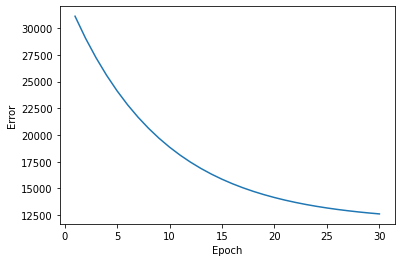

In [67]:
plt.plot(list(i for i in range(1, 30 + 1)),log_error)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()